### JDF - boundary condition analysis and transports

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import warnings
warnings.filterwarnings('ignore') 

In [4]:
import netCDF4 as nc
import matplotlib
from matplotlib import pyplot as plt
from salishsea_tools import (
    viz_tools)
import cmocean as cm
import numpy as np
import seawater
import arrow
import xarray as xr
import pickle

## Visualize where transports are output in the model

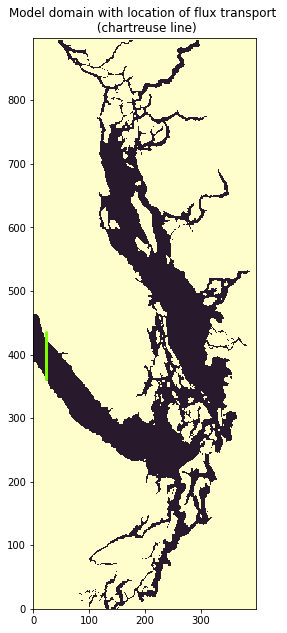

In [5]:
fact = 0.7
fig = plt.figure(figsize=(15*fact, 15*fact))
ax1 = plt.subplot2grid((1,1), (0,0), colspan=1, rowspan=1) 
bath = '/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc'
grid = nc.Dataset(bath)
viz_tools.set_aspect(ax1)   
fmask = (grid['fmask'][0,0,:,:])    
mesh = ax1.pcolormesh(fmask, vmin=0, vmax=1, cmap = cm.cm.deep)
# for i in range(370,480):
#     pts = ax1.scatter(5,i,s=3,c='red', marker='o')
    
for i in range(361,(361+75)):
    pts = ax1.scatter(23,i,s=3,c='chartreuse', marker='o')
    
w = plt.title('Model domain with location of flux transport \n (chartreuse line)')

In [6]:
BR3_var = pickle.load(open('/data/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/BR3_DIC_means_inletsIN.pkl' , 'rb')) 
BR3_var_sal = pickle.load(open('/data/tjarniko/MEOPAR/analysis_tereza/notebooks/PI_CARBON_PAPER/MAIN_ANALYSIS/pkls/BR3_sal_means_inletsIN.pkl' , 'rb')) 


In [7]:
print(np.nanmean(BR3_var))
print(np.nanmean(BR3_var_sal))


2022.4949248592268
29.778087573357954


In [8]:
tdir = '/data/sallen/results/MEOPAR/averages/hindcast.201905/'

##### code commented out to calculate sumstor_DIC 
        
        sumstor_DIC form: [yr (2013-2019), day (from June 1 to Sept 1) depth] 
        mean by-depth DIC in LiveOcean BC's for every summer day of every year between 2013-2019

In [9]:
# yrs = np.arange(2013,2020,1)

# sumstor_DIC = np.zeros([len(yrs),366,40])
# LO = '/results/forcing/LiveOcean/boundary_conditions/'
# # sumstor_DIC = np.zeros([len(yrs),daysin,40])
# for yr in yrs:
#     print(yr)
#     start =f'{yr}-01-01'
#     end =f'{yr}-12-31'
#     daysin = 365
#     if yr == 2016: daysin = 366
    
    
#     start_run = arrow.get(start)
#     end_run = arrow.get(end)
#     arrow_array2 = []

#     for r in arrow.Arrow.span_range('day', start_run, end_run):
#         arrow_array2.append(r)

#     for i in range(0,daysin):
#         if i%50 == 0:
#             print(i)

#         tdate = arrow_array2[i][0]
#         yy = tdate.format('YYYY')
#         mm = tdate.format('MM')
#         dd = tdate.format('DD')
#         strnam = f'LiveOcean_v201905_y{yy}m{mm}d{dd}.nc'
#         #print(strnam)
#         tdat = xr.open_dataset(LO+strnam)
#         DIC = tdat['DIC'][0,:,0,:]
#         sumstor_DIC[yr-2013,i,:]=np.nanmean(DIC, axis = 1) 
# pickle.dump(sumstor_DIC, open("fullyearstor_DIC.pkl", 'wb'))

In [10]:

sumstor_DIC = pickle.load(open('./pkls_pyscripts/fullyearstor_DIC.pkl', 'rb'))  

In [11]:
# sumstor_DIC[0,:,0]

### DIC content of boundary conditions and its anomaly from all-year mean at 24, 76, 253, and 279 m 
##### from June 1 to Sept 1

    - increase in DIC at depth over the course of summer
    - anomalous dip in 2013 at both 24m and 76 m
    - 2013 is anomalous in surf. cond, 2015 is potentially slightly anomalous at depth 
    - no stark trends at first glance

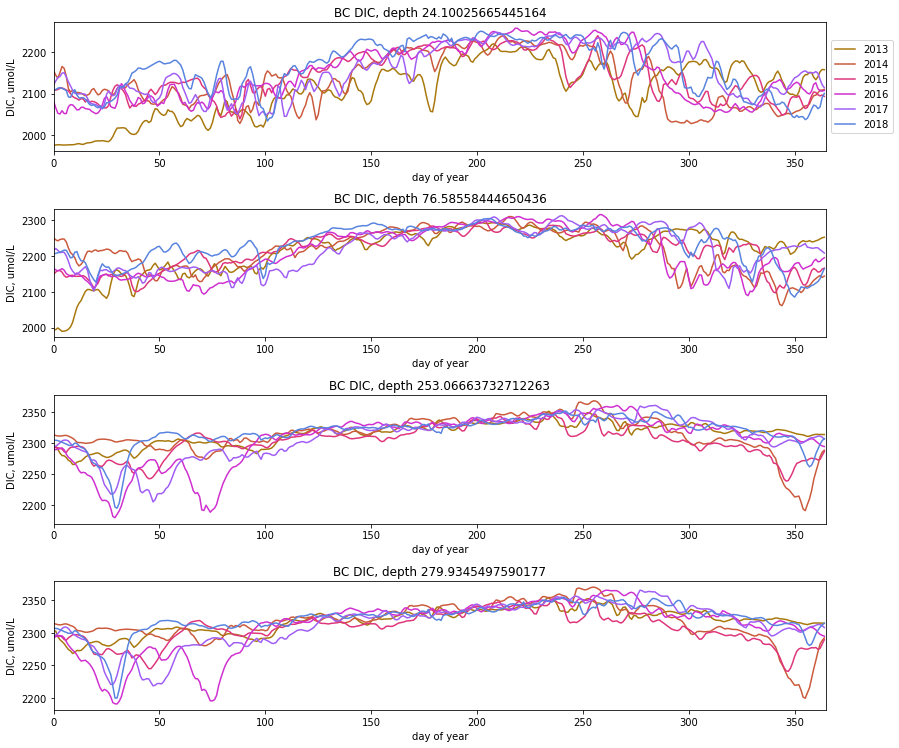

In [12]:
yrs = np.arange(2013,2019,1)
cmap = cm.cm.phase
dayr = np.arange(0,365,1)
depth = [20,25,32,33]
grid = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
depths = (grid['gdept_1d'][0,:])
#print(depths)

fact = 0.7
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(18*fact, 15*fact))

for i in range(0,4):
    for yr in yrs:
        ax = axes[i]
        ax.plot(dayr,sumstor_DIC[yr-2013,0:365,depth[i]], color = cmap((yr-2013)/9), label = str(yr))
    ax.set_xlim([0,365])
    ax.set_ylabel('DIC, umol/L')
    ax.set_xlabel('day of year')
    ax.set_title(f'BC DIC, depth {depths[depth[i]]}')
    #ax.set_ylim([-120,120])
    if i == 0:
        ax.legend(bbox_to_anchor=[1, 0.9])
plt.tight_layout()

# anomaly fluxes 

Sign convention:

    -water into domain: positive
    -departure of DIC from baseline. baseline = 2050, higher than that - positive. 
    

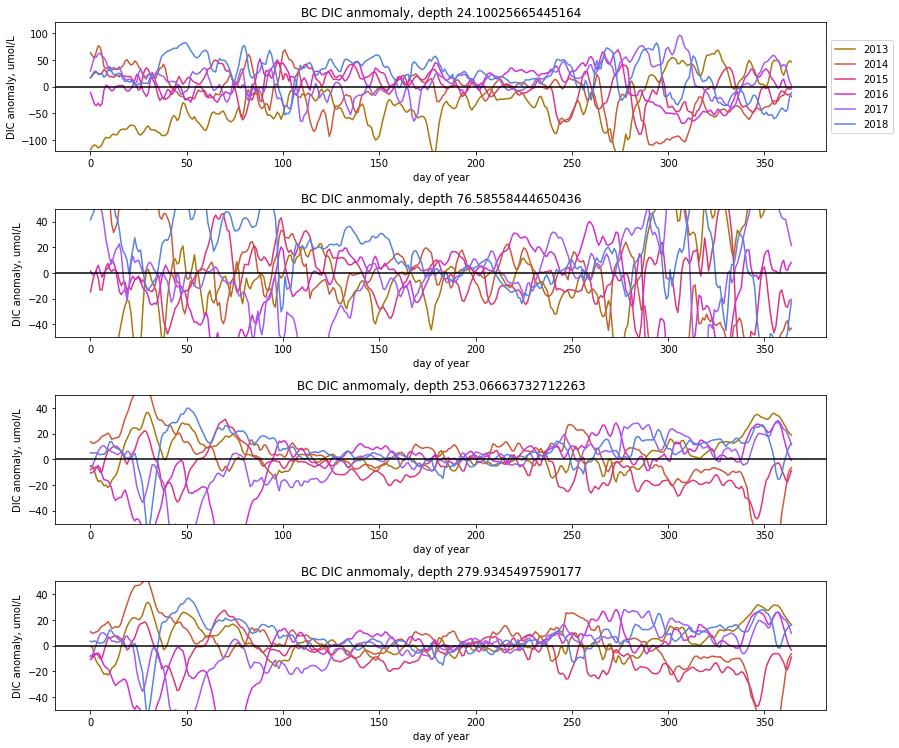

In [13]:
cmap = cm.cm.phase
dayr = np.arange(0,365,1)


fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(18*fact, 15*fact))

for i in range(0,4):
    for yr in yrs:
        ax = axes[i]
        ax.plot(dayr,(sumstor_DIC[yr-2013,0:365,depth[i]]
                      -np.nanmean(sumstor_DIC[:,0:365,depth[i]],axis = 0)),
                color = cmap((yr-2013)/9), label = str(yr))
    #ax.set_xlim([152,244])
    ax.set_ylim([-120,120])
    ax.set_xlabel('day of year')
    ax.set_ylabel('DIC anomaly, umol/L')
    if i > 0:
        ax.set_ylim([-50,50])
    ax.axhline(y=0,color = 'k')
    if i == 0:
        ax.legend(bbox_to_anchor=[1, 0.9])
    ax.set_title(f'BC DIC anmomaly, depth {depths[depth[i]]}')

plt.tight_layout()

## calculating transports for one test day from physical transports at i = 23 (kg/s) and DIC content at the same place
    
    calculuation:
    
    input data:
        DIC (umol/L)
       density (kg/L)
       physical flux transport (kg/s)
       
       want to get, in each grid cell - mols per day
       
   
    mols/umol * umol/L * L/kg * kg/s * s/ hr to get flux per hour
    sum the 24 hourly fluxes to get mol/day
    


In [14]:
uflx_nc = nc.Dataset('/results2/SalishSea/hindcast.201905/26jan13/SalishSea_1h_20130126_20130126_flux_U.nc')
carp_nc = nc.Dataset('/results2/SalishSea/hindcast.201905/26jan13/SalishSea_1h_20130126_20130126_carp_T.nc')

# transport in kg/s at the i = 23, j = 361:361+75 boundary
u_transport = uflx_nc['u_masstr'][:,:,:,0]
# DIC concentration there
DIC = carp_nc['dissolved_inorganic_carbon'][:,:,361:(361+75),23]
#potential density sigma theta there in kg/L
sigma0 = (carp_nc['sigma_theta'][:,:,361:(361+75),23]+1000)/1000
#inverse of pot. dense in L/kg
inv_sigma0 = 1/sigma0
print('density: weight of a L of seawater')
print(sigma0[0,0,30])
print('inverse of that')
print(inv_sigma0[0,0,30])


#calculate C mol per hour
#mol/umol * umol/L * L/kg * kg/s * s/ hr to get flux per hour

C_hr =  1e-6 * DIC * inv_sigma0 * u_transport * (60*60)
#sum hourly flux to get umol C/day
C_day = np.nansum(C_hr, axis = 0)
print(np.shape(C_day))


# transport in kg/s at the i = 23, j = 361:361+75 boundary
u_transport = uflx_nc['u_masstr'][:,:,:,0]
# DIC concentration there
DIC = carp_nc['dissolved_inorganic_carbon'][:,:,361:(361+75),23]-2050
#potential density sigma theta there in kg/L
sigma0 = (carp_nc['sigma_theta'][:,:,361:(361+75),23]+1000)/1000
#inverse of pot. dense in L/kg
inv_sigma0 = 1/sigma0
print('density: weight of a L of seawater')
print(sigma0[0,0,30])
print('inverse of that')
print(inv_sigma0[0,0,30])


#calculate C mol per hour
#mol/umol * umol/L * L/kg * kg/s * s/ hr to get flux per hour

C_hr =  1e-6 * DIC * inv_sigma0 * u_transport * (60*60)
#sum hourly flux to get umol C/day
C_day_anom = np.nansum(C_hr, axis = 0)
print(np.shape(C_day_anom))


density: weight of a L of seawater
1.0240283
inverse of that
0.9765355
(40, 75)
density: weight of a L of seawater
1.0240283
inverse of that
0.9765355
(40, 75)


In [15]:
#size of a the u-grid in m2 per grid cell
ulength = (grid['e2u'][0,361:(361+75),23])

udep = grid['e3u_0'][0,:,361:(361+75),23]

slice_ar = np.zeros([40,75])

for i in range(0,40):
    
    slice_ar[i,:] = ulength * udep[i,:]
    



In [16]:
#print(uflx_nc['u_masstr'])
print('checking magnitudes and dimensions make sense')
print('net transport of seawater it i=23, j=391 in kg/s')
print(u_transport[0,0,30])
print('size of that grid cell in m2')
print(slice_ar[0,30])
print('transport kg/gridcell/s = velocity(m/s) * kg/m3 * m2/grid cell')
print('assuming 1.024kg/L, 1000L/m3, and ~506 m2/grid cell, what is velocity')
print(-159446.47 / (1.024*1000 * 506) )
print('ok that seems like a reasonable speed for water to be going')
print('ok if there are ~1800 umol/kg here, and 1 mole = 1e-6 umol, how many mols per second of C are we transporting')
print(1800*1e-6*-159446.47)
print('ok how many mols per day assuming const. vel. (constant transport)')
print((1800*1e-6*-159446.47*24*3600))
print('ok how many mols per m2 per day if grid cell is 500 m2 big')
print((1800*1e-6*-159446.47*24*3600/500))
print('ok yes orders of magnitude do make sense')

checking magnitudes and dimensions make sense
net transport of seawater it i=23, j=391 in kg/s
-159446.47
size of that grid cell in m2
506.17044239398166
transport kg/gridcell/s = velocity(m/s) * kg/m3 * m2/grid cell
assuming 1.024kg/L, 1000L/m3, and ~506 m2/grid cell, what is velocity
-0.30772617264698615
ok that seems like a reasonable speed for water to be going
ok if there are ~1800 umol/kg here, and 1 mole = 1e-6 umol, how many mols per second of C are we transporting
-287.003646
ok how many mols per day assuming const. vel. (constant transport)
-24797115.0144
ok how many mols per m2 per day if grid cell is 500 m2 big
-49594.230028800004
ok yes orders of magnitude do make sense


## Visualising one day of carbon transport (in mol C m^{-2}/day)

Text(5, 250, 'Olympic \n Penninsula')

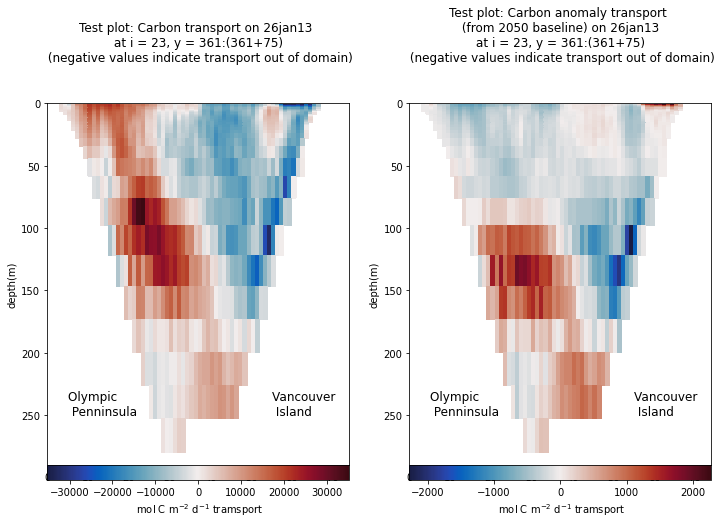

In [17]:
fig, [ax1,ax2] = plt.subplots(nrows=1, ncols=2, figsize=(17*fact, 10*fact))

section_slice = np.arange(0,75)
tmesh = nc.Dataset('/data/tjarniko/MEOPAR/grid/mesh_mask201702.nc')
zlevels = tmesh['gdept_1d'][:]
C_day[C_day == 0 ] = np.nan
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],C_day/slice_ar, cmap = cm.cm.balance, \
                      vmin = -1 * np.max(np.abs(C_day/slice_ar)), vmax = np.max(np.abs(C_day/slice_ar)))
ax1.set_ylim([0,290])
ax1.invert_yaxis()
cbar = fig.colorbar(mesh, ax=ax1, orientation = 'horizontal',fraction=0.05, pad=0.0)#, ticks = tticks)
cbar.set_label(label=' mol C m$^{-2}$ d$^{-1}$ tramsport')
ax1.set_title('Test plot: Carbon transport on 26jan13 \n at i = 23, y = 361:(361+75) \n (negative values indicate transport out of domain)', y=1.1)
ax1.set_ylabel('depth(m)')
#ax1.text(y=250,x=60,'what')
x = 55
y = 250
ax1.text(x, y, 'Vancouver \n Island', fontsize=12)
x = 5
ax1.text(x, y, 'Olympic \n Penninsula', fontsize=12)

##############

C_day_anom[C_day_anom == 0 ] = np.nan
mesh = ax2.pcolormesh(section_slice[:],zlevels[0],C_day_anom/slice_ar, cmap = cm.cm.balance, \
                      vmin = -1 * np.max(np.abs(C_day_anom/slice_ar)), vmax = np.max(np.abs(C_day_anom/slice_ar)))
ax2.set_ylim([0,290])
ax2.invert_yaxis()
cbar = fig.colorbar(mesh, ax=ax2, orientation = 'horizontal',fraction=0.05, pad=0.0)#, ticks = tticks)
cbar.set_label(label=' mol C m$^{-2}$ d$^{-1}$ tramsport')
ax2.set_title('Test plot: Carbon anomaly transport \n (from 2050 baseline) on 26jan13 \n at i = 23, y = 361:(361+75) \n (negative values indicate transport out of domain)', y=1.1)
ax2.set_ylabel('depth(m)')
#ax2.text(y=250,x=60,'what')
x = 55
y = 250
ax2.text(x, y, 'Vancouver \n Island', fontsize=12)
x = 5
ax2.text(x, y, 'Olympic \n Penninsula', fontsize=12)

## code for extracting daily transports - put into a script of form tr_2013.py and calc for 2013-2019

In [18]:
# yr = 2013
# yrday = 365
# trans_DIC_2013_mol_per_gridcell = np.zeros([365,40,75])

# start =f'{yr}-01-01'
# end =f'{yr}-12-31'

# start_run = arrow.get(start)
# end_run = arrow.get(end)
# arrow_array2 = []

# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array2.append(r)

# for i in range(0,365):

#     tdate = arrow_array2[i][0]
#     yyyy = tdate.format('YYYY')
#     yy = tdate.format('YY')
#     mm = tdate.format('MM')
#     dd = tdate.format('DD')
#     mon = tdate.format('MMM')
#     mon = mon.lower()
#     verbstr = f'{dd}{mon}{yy}'
#     print(verbstr)
    
#     uflx_nc = nc.Dataset(f'/results2/SalishSea/hindcast.201905/{dd}{mon}{yy}/SalishSea_1h_{yyyy}{mm}{dd}_{yyyy}{mm}{dd}_flux_U.nc')
#     carp_nc = nc.Dataset(f'/results2/SalishSea/hindcast.201905/{dd}{mon}{yy}/SalishSea_1h_{yyyy}{mm}{dd}_{yyyy}{mm}{dd}_carp_T.nc')
   

#     # transport in kg/s at the i = 23, j = 361:361+75 boundary
#     u_transport = uflx_nc['u_masstr'][:,:,:,0]
#     # DIC concentration there
#     DIC = carp_nc['dissolved_inorganic_carbon'][:,:,361:(361+75),23]
#     #potential density sigma theta there in kg/L
#     sigma0 = (carp_nc['sigma_theta'][:,:,361:(361+75),23]+1000)/1000
#     #inverse of pot. dense in L/kg
#     inv_sigma0 = 1/sigma0

#     #calculate C mol per hour
#     #mol/umol * umol/L * L/kg * kg/s * s/ hr to get flux per hour
#     C_hr =  1e-6 * DIC * inv_sigma0 * u_transport * (60*60)
#     #sum hourly flux to get umol C/day
#     C_day = np.nansum(C_hr, axis = 0)
#     trans_DIC_2013_mol_per_gridcell[i,:,:] = C_day
    

# pickle.dump(trans_DIC_2013_mol_per_gridcell, open("trans_DIC_2013_mol_per_gridcell.pkl", 'wb'))

### physical transports

In [19]:
# yr = 2019
# yrday = 365
# trans_DIC_2019_mol_per_gridcell = np.zeros([365,40,75])
# start =f'{yr}-01-01'; end =f'{yr}-12-31'

# start_run = arrow.get(start); end_run = arrow.get(end)
# arrow_array2 = []

# for r in arrow.Arrow.span_range('day', start_run, end_run):
#     arrow_array2.append(r)

# for i in range(0,365):

#     tdate = arrow_array2[i][0]
#     yyyy = tdate.format('YYYY')
#     yy = tdate.format('YY')
#     mm = tdate.format('MM')
#     dd = tdate.format('DD')
#     mon = tdate.format('MMM')
#     mon = mon.lower()
#     verbstr = f'{dd}{mon}{yy}'
#     print(verbstr)
    
#     uflx_nc = nc.Dataset(f'/results2/SalishSea/hindcast.201905/{dd}{mon}{yy}/SalishSea_1h_{yyyy}{mm}{dd}_{yyyy}{mm}{dd}_flux_U.nc')

#     # transport in kg/s at the i = 23, j = 361:361+75 boundary
#     #kg/day
#     u_transport = np.sum(uflx_nc['u_masstr'][:,:,:,0], axis = 0)*(3600)
#     trans_DIC_2019_mol_per_gridcell[i,:,:] = u_transport
    

# pickle.dump(trans_DIC_2019_mol_per_gridcell, open("trans_phys_2019_kg_per_gridcell.pkl", 'wb'))

In [20]:
##trans_anomanomDIC_2050_2050_2013_mol_per_gridcell.pkl
trans_DIC_2013_mol_per_gridcell = pickle.load(open('./pkls_pyscripts/trans_DIC_2013_mol_per_gridcell.pkl', 'rb')) 
trans_DIC_2014_mol_per_gridcell = pickle.load(open('./pkls_pyscripts/trans_DIC_2014_mol_per_gridcell.pkl', 'rb'))  
trans_DIC_2015_mol_per_gridcell = pickle.load(open('./pkls_pyscripts/trans_DIC_2015_mol_per_gridcell.pkl', 'rb')) 
trans_DIC_2016_mol_per_gridcell = pickle.load(open('./pkls_pyscripts/trans_DIC_2016_mol_per_gridcell.pkl', 'rb'))  
trans_DIC_2017_mol_per_gridcell = pickle.load(open('./pkls_pyscripts/trans_DIC_2017_mol_per_gridcell.pkl', 'rb')) 
trans_DIC_2018_mol_per_gridcell = pickle.load(open('./pkls_pyscripts/trans_DIC_2018_mol_per_gridcell.pkl', 'rb'))
trans_DIC_2019_mol_per_gridcell = pickle.load(open('./pkls_pyscripts/trans_DIC_2019_mol_per_gridcell.pkl', 'rb'))

trans_anomDIC_2050_2013_mol_per_gridcell = pickle.load(open('./pkls_pyscripts/trans_anomDIC_2050_2013_mol_per_gridcell.pkl', 'rb')) 
trans_anomDIC_2050_2014_mol_per_gridcell = pickle.load(open('./pkls_pyscripts/trans_anomDIC_2050_2014_mol_per_gridcell.pkl', 'rb'))  
trans_anomDIC_2050_2015_mol_per_gridcell = pickle.load(open('./pkls_pyscripts/trans_anomDIC_2050_2015_mol_per_gridcell.pkl', 'rb')) 
trans_anomDIC_2050_2016_mol_per_gridcell = pickle.load(open('./pkls_pyscripts/trans_anomDIC_2050_2016_mol_per_gridcell.pkl', 'rb'))  
trans_anomDIC_2050_2017_mol_per_gridcell = pickle.load(open('./pkls_pyscripts/trans_anomDIC_2050_2017_mol_per_gridcell.pkl', 'rb')) 
trans_anomDIC_2050_2018_mol_per_gridcell = pickle.load(open('./pkls_pyscripts/trans_anomDIC_2050_2018_mol_per_gridcell.pkl', 'rb'))
trans_anomDIC_2050_2019_mol_per_gridcell = pickle.load(open('./pkls_pyscripts/trans_anomDIC_2050_2019_mol_per_gridcell.pkl', 'rb'))

trans_phys_2013_kg_per_gridcell = pickle.load(open('./pkls_pyscripts/trans_phys_2013_kg_per_gridcell.pkl', 'rb')) 
trans_phys_2014_kg_per_gridcell = pickle.load(open('./pkls_pyscripts/trans_phys_2014_kg_per_gridcell.pkl', 'rb'))  
trans_phys_2015_kg_per_gridcell = pickle.load(open('./pkls_pyscripts/trans_phys_2015_kg_per_gridcell.pkl', 'rb')) 
trans_phys_2016_kg_per_gridcell = pickle.load(open('./pkls_pyscripts/trans_phys_2016_kg_per_gridcell.pkl', 'rb'))  
trans_phys_2017_kg_per_gridcell = pickle.load(open('./pkls_pyscripts/trans_phys_2017_kg_per_gridcell.pkl', 'rb')) 
trans_phys_2018_kg_per_gridcell = pickle.load(open('./pkls_pyscripts/trans_phys_2018_kg_per_gridcell.pkl', 'rb'))
trans_phys_2019_kg_per_gridcell = pickle.load(open('./pkls_pyscripts/trans_phys_2019_kg_per_gridcell.pkl', 'rb'))

trans_anomsal_30pt0_2013_mol_per_gridcell = pickle.load(open('./pkls_pyscripts/trans_anomsal_30pt0_2013_mol_per_gridcell.pkl', 'rb')) 
trans_anomsal_30pt0_2014_mol_per_gridcell = pickle.load(open('./pkls_pyscripts/trans_anomsal_30pt0_2014_mol_per_gridcell.pkl', 'rb'))  
trans_anomsal_30pt0_2015_mol_per_gridcell = pickle.load(open('./pkls_pyscripts/trans_anomsal_30pt0_2015_mol_per_gridcell.pkl', 'rb')) 
trans_anomsal_30pt0_2016_mol_per_gridcell = pickle.load(open('./pkls_pyscripts/trans_anomsal_30pt0_2016_mol_per_gridcell.pkl', 'rb'))  
trans_anomsal_30pt0_2017_mol_per_gridcell = pickle.load(open('./pkls_pyscripts/trans_anomsal_30pt0_2017_mol_per_gridcell.pkl', 'rb')) 
trans_anomsal_30pt0_2018_mol_per_gridcell = pickle.load(open('./pkls_pyscripts/trans_anomsal_30pt0_2018_mol_per_gridcell.pkl', 'rb'))
trans_anomsal_30pt0_2019_mol_per_gridcell = pickle.load(open('./pkls_pyscripts/trans_anomsal_30pt0_2019_mol_per_gridcell.pkl', 'rb'))

In [21]:
size_ar_masked = slice_ar*grid['umask'][0,:,361:361+75,23]
# print(size_ar_masked[0,:])

size_ar_perrow = np.nansum(size_ar_masked,axis=1)
print(np.shape(size_ar_perrow))

size_ar_pr_bc12 = np.zeros([40,12])

for i in range(0,12):
    size_ar_pr_bc12[:,i] = size_ar_perrow

(40,)


In [22]:
print(np.shape(trans_phys_2013_kg_per_gridcell))

(365, 40, 75)


In [23]:
anomDIC_2050_flux_stor = np.zeros([7,40,12])
phys_flux_stor = np.zeros([7,40,12])

hinds = [trans_anomDIC_2050_2013_mol_per_gridcell,trans_anomDIC_2050_2014_mol_per_gridcell,trans_anomDIC_2050_2015_mol_per_gridcell,
         trans_anomDIC_2050_2016_mol_per_gridcell,trans_anomDIC_2050_2017_mol_per_gridcell,
        trans_anomDIC_2050_2018_mol_per_gridcell,trans_anomDIC_2050_2019_mol_per_gridcell]

for yr in range(0,7):
    hind = hinds[yr]
    #print(yr+2013)
    for m in range(0,12):
        #print(m+1)
        hind_month = np.nanmean(hind[m*30:m*30+30,:,:],axis =0)
        #print(np.shape(hind_month))
        
        anomDIC_2050_flux_stor[yr,:,m] = np.nansum(hind_month, axis = 1)
            
pickle.dump(anomDIC_2050_flux_stor, open("anomDIC_2050_flux_stor.pkl", 'wb'))


hinds = [trans_phys_2013_kg_per_gridcell,trans_phys_2014_kg_per_gridcell,trans_phys_2015_kg_per_gridcell,
         trans_phys_2016_kg_per_gridcell,trans_phys_2017_kg_per_gridcell,
        trans_phys_2018_kg_per_gridcell,trans_phys_2019_kg_per_gridcell]

for yr in range(0,7):
    hind = hinds[yr]
    for m in range(0,12):
        hind_month = np.nanmean(hind[m*30:m*30+30,:,:],axis =0)
        phys_flux_stor[yr,:,m] = np.nansum(hind_month, axis = 1)
            
pickle.dump(phys_flux_stor, open("phys_flux_stor.pkl", 'wb'))

hinds = [trans_anomsal_30pt0_2013_mol_per_gridcell,trans_anomsal_30pt0_2014_mol_per_gridcell,trans_anomsal_30pt0_2015_mol_per_gridcell,
         trans_anomsal_30pt0_2016_mol_per_gridcell,trans_anomsal_30pt0_2017_mol_per_gridcell,
        trans_anomsal_30pt0_2018_mol_per_gridcell,trans_anomsal_30pt0_2019_mol_per_gridcell]

anomsal_flux_stor = np.zeros([7,40,12])
for yr in range(0,7):
    hind = hinds[yr]
    for m in range(0,12):
        hind_month = np.nanmean(hind[m*30:m*30+30,:,:],axis =0)
        anomsal_flux_stor[yr,:,m] = np.nansum(hind_month, axis = 1)

pickle.dump(anomsal_flux_stor, open("anomsal_flux_stor.pkl", 'wb'))

## visualising a montly climatology of anomaly transports of C with 12 idealized months (30 days each), as well as by-month departures from it

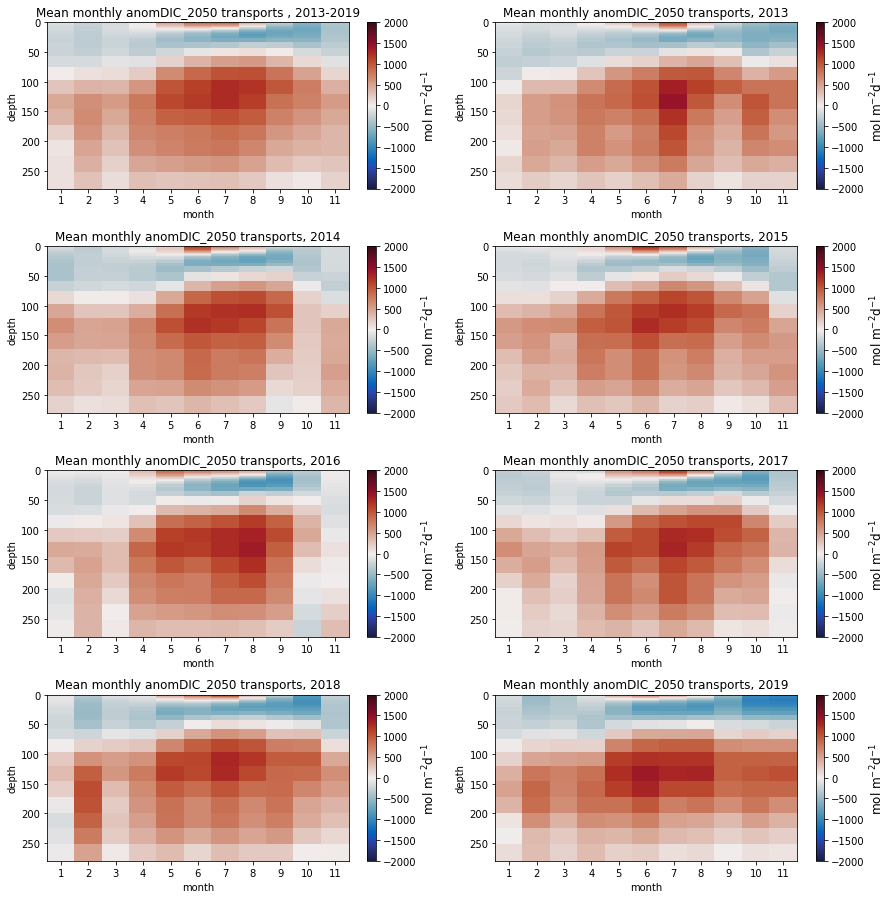

In [24]:
tvmin = -2e3; tvmax = 2e3
fact = 1.2
fig = plt.figure(figsize=(10.5*fact, 10.5*fact)) 

ax1 = plt.subplot2grid((4,2), (0,0), colspan=1,rowspan = 1)
tdat = np.nanmean(anomDIC_2050_flux_stor[:,:,:],axis=0)
tdat_tp = np.divide(tdat, size_ar_pr_bc12) 
section_slice = np.arange(1,13,1)
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = tvmin, vmax = tvmax)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly anomDIC_2050 transports , 2013-2019')
cbar.set_label('mol m$^{-2}$d$^{-1}$', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (0,1), colspan=1,rowspan = 1)
tdat = (anomDIC_2050_flux_stor[0,:,:]); tdat_tp = np.divide(tdat, size_ar_pr_bc12) 
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = tvmin, vmax = tvmax)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly anomDIC_2050 transports, 2013')
cbar.set_label('mol m$^{-2}$d$^{-1}$', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (1,0), colspan=1,rowspan = 1)
tdat = (anomDIC_2050_flux_stor[1,:,:]); tdat_tp = np.divide(tdat, size_ar_pr_bc12) 
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = tvmin, vmax = tvmax)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly anomDIC_2050 transports, 2014')
cbar.set_label('mol m$^{-2}$d$^{-1}$', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (1,1), colspan=1,rowspan = 1)
tdat = (anomDIC_2050_flux_stor[2,:,:]); tdat_tp = np.divide(tdat, size_ar_pr_bc12) 
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = tvmin, vmax = tvmax)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly anomDIC_2050 transports, 2015')
cbar.set_label('mol m$^{-2}$d$^{-1}$', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (2,0), colspan=1,rowspan = 1)
tdat = (anomDIC_2050_flux_stor[3,:,:]); tdat_tp = np.divide(tdat, size_ar_pr_bc12) 
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = tvmin, vmax = tvmax)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly anomDIC_2050 transports, 2016')
cbar.set_label('mol m$^{-2}$d$^{-1}$', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (2,1), colspan=1,rowspan = 1)
tdat = (anomDIC_2050_flux_stor[4,:,:]); tdat_tp = np.divide(tdat, size_ar_pr_bc12) 
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = tvmin, vmax = tvmax)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly anomDIC_2050 transports, 2017')
cbar.set_label('mol m$^{-2}$d$^{-1}$', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (3,0), colspan=1,rowspan = 1)
tdat = (anomDIC_2050_flux_stor[5,:,:]); tdat_tp = np.divide(tdat, size_ar_pr_bc12) 
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = tvmin, vmax = tvmax)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly anomDIC_2050 transports, 2018')
cbar.set_label('mol m$^{-2}$d$^{-1}$', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (3,1), colspan=1,rowspan = 1)
tdat = (anomDIC_2050_flux_stor[6,:,:]); tdat_tp = np.divide(tdat, size_ar_pr_bc12) 
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = tvmin, vmax = tvmax)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly anomDIC_2050 transports, 2019')
cbar.set_label('mol m$^{-2}$d$^{-1}$', fontsize = 12)

plt.tight_layout()

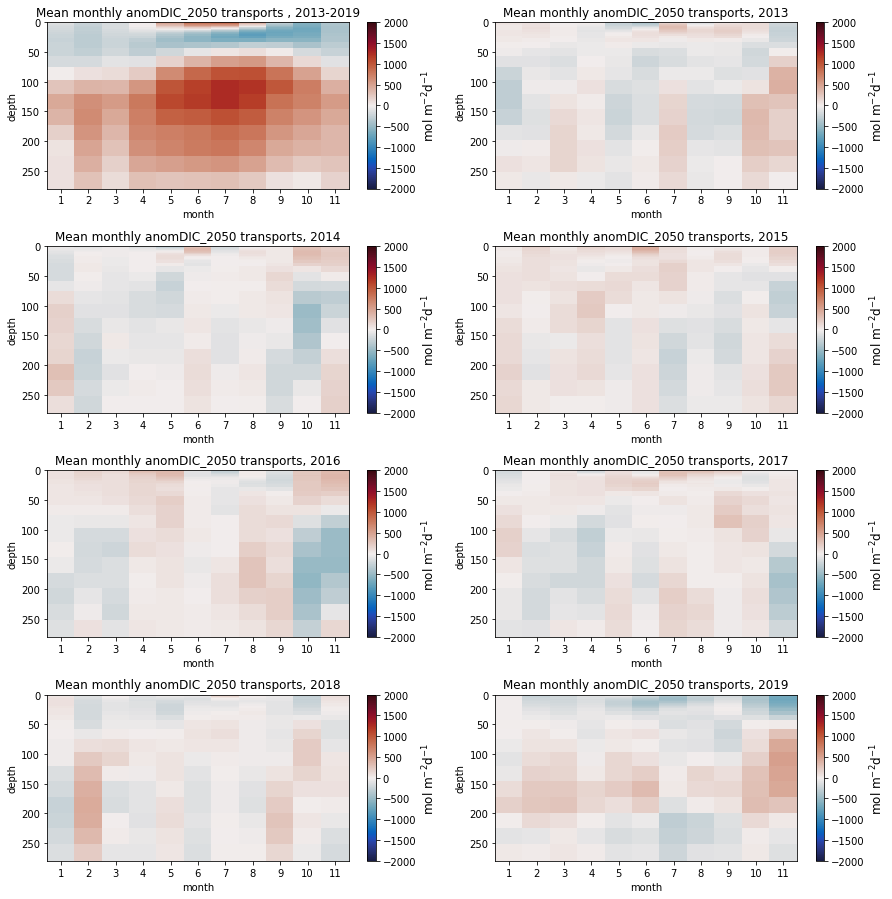

In [25]:
tvmin = -2e3; tvmax = 2e3
fact = 1.2
fig = plt.figure(figsize=(10.5*fact, 10.5*fact)) 

ax1 = plt.subplot2grid((4,2), (0,0), colspan=1,rowspan = 1)
tdat = np.nanmean(anomDIC_2050_flux_stor[:,:,:],axis=0)
tmean = np.copy(tdat)
tdat_tp = np.divide(tdat, size_ar_pr_bc12) 
section_slice = np.arange(1,13,1)
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = tvmin, vmax = tvmax)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly anomDIC_2050 transports , 2013-2019')
cbar.set_label('mol m$^{-2}$d$^{-1}$', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (0,1), colspan=1,rowspan = 1)
tdat = (anomDIC_2050_flux_stor[0,:,:]); #tdat_tp  = tdat - tmean
tdat_tp = np.divide(tdat - tmean, size_ar_pr_bc12) 
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = tvmin, vmax = tvmax)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly anomDIC_2050 transports, 2013')
cbar.set_label('mol m$^{-2}$d$^{-1}$', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (1,0), colspan=1,rowspan = 1)
tdat = (anomDIC_2050_flux_stor[1,:,:]); tdat_tp = np.divide(tdat - tmean, size_ar_pr_bc12) 
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = tvmin, vmax = tvmax)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly anomDIC_2050 transports, 2014')
cbar.set_label('mol m$^{-2}$d$^{-1}$', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (1,1), colspan=1,rowspan = 1)
tdat = (anomDIC_2050_flux_stor[2,:,:]); tdat_tp = np.divide(tdat - tmean, size_ar_pr_bc12) 
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = tvmin, vmax = tvmax)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly anomDIC_2050 transports, 2015')
cbar.set_label('mol m$^{-2}$d$^{-1}$', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (2,0), colspan=1,rowspan = 1)
tdat = (anomDIC_2050_flux_stor[3,:,:]); tdat_tp = np.divide(tdat - tmean, size_ar_pr_bc12) 
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = tvmin, vmax = tvmax)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly anomDIC_2050 transports, 2016')
cbar.set_label('mol m$^{-2}$d$^{-1}$', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (2,1), colspan=1,rowspan = 1)
tdat = (anomDIC_2050_flux_stor[4,:,:]); tdat_tp = np.divide(tdat - tmean, size_ar_pr_bc12) 
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = tvmin, vmax = tvmax)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly anomDIC_2050 transports, 2017')
cbar.set_label('mol m$^{-2}$d$^{-1}$', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (3,0), colspan=1,rowspan = 1)
tdat = (anomDIC_2050_flux_stor[5,:,:]); tdat_tp = np.divide(tdat - tmean, size_ar_pr_bc12) 
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = tvmin, vmax = tvmax)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly anomDIC_2050 transports, 2018')
cbar.set_label('mol m$^{-2}$d$^{-1}$', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (3,1), colspan=1,rowspan = 1)
tdat = (anomDIC_2050_flux_stor[6,:,:]); tdat_tp = np.divide(tdat - tmean, size_ar_pr_bc12) 
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = tvmin, vmax = tvmax)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly anomDIC_2050 transports, 2019')
cbar.set_label('mol m$^{-2}$d$^{-1}$', fontsize = 12)

plt.tight_layout()

### sal (kg/m2/day fluxes)

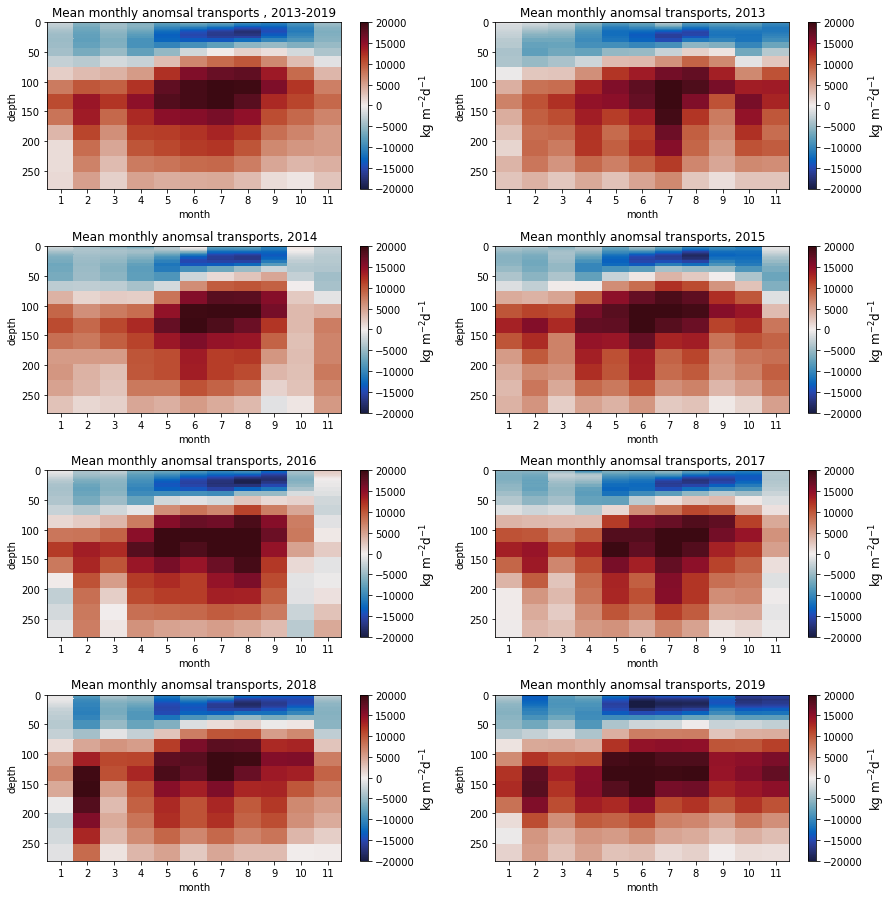

In [26]:
tvmin = -2e4 ; tvmax = 2e4
fact = 1.2
fig = plt.figure(figsize=(10.5*fact, 10.5*fact)) 

ax1 = plt.subplot2grid((4,2), (0,0), colspan=1,rowspan = 1)
tdat = np.nanmean(anomsal_flux_stor[:,:,:],axis=0)
tdat_tp = np.divide(tdat, size_ar_pr_bc12) 
section_slice = np.arange(1,13,1)
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = tvmin, vmax = tvmax)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly anomsal transports , 2013-2019')
cbar.set_label('kg m$^{-2}$d$^{-1}$', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (0,1), colspan=1,rowspan = 1)
tdat = (anomsal_flux_stor[0,:,:]); tdat_tp = np.divide(tdat, size_ar_pr_bc12) 
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = tvmin, vmax = tvmax)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly anomsal transports, 2013')
cbar.set_label('kg m$^{-2}$d$^{-1}$', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (1,0), colspan=1,rowspan = 1)
tdat = (anomsal_flux_stor[1,:,:]); tdat_tp = np.divide(tdat, size_ar_pr_bc12) 
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = tvmin, vmax = tvmax)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly anomsal transports, 2014')
cbar.set_label('kg m$^{-2}$d$^{-1}$', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (1,1), colspan=1,rowspan = 1)
tdat = (anomsal_flux_stor[2,:,:]); tdat_tp = np.divide(tdat, size_ar_pr_bc12) 
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = tvmin, vmax = tvmax)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly anomsal transports, 2015')
cbar.set_label('kg m$^{-2}$d$^{-1}$', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (2,0), colspan=1,rowspan = 1)
tdat = (anomsal_flux_stor[3,:,:]); tdat_tp = np.divide(tdat, size_ar_pr_bc12) 
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = tvmin, vmax = tvmax)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly anomsal transports, 2016')
cbar.set_label('kg m$^{-2}$d$^{-1}$', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (2,1), colspan=1,rowspan = 1)
tdat = (anomsal_flux_stor[4,:,:]); tdat_tp = np.divide(tdat, size_ar_pr_bc12) 
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = tvmin, vmax = tvmax)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly anomsal transports, 2017')
cbar.set_label('kg m$^{-2}$d$^{-1}$', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (3,0), colspan=1,rowspan = 1)
tdat = (anomsal_flux_stor[5,:,:]); tdat_tp = np.divide(tdat, size_ar_pr_bc12) 
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = tvmin, vmax = tvmax)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly anomsal transports, 2018')
cbar.set_label('kg m$^{-2}$d$^{-1}$', fontsize = 12)

ax1 = plt.subplot2grid((4,2), (3,1), colspan=1,rowspan = 1)
tdat = (anomsal_flux_stor[6,:,:]); tdat_tp = np.divide(tdat, size_ar_pr_bc12) 
ax1.set_xticks(np.arange(1.5,13.5,1)); ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12'])
mesh = ax1.pcolormesh(section_slice[:],zlevels[0],tdat_tp, cmap = cm.cm.balance, \
                      vmin = tvmin, vmax = tvmax)
ax1.set_ylim([0,280]); ax1.invert_yaxis()
cbar = plt.colorbar(mesh); ax1.set_xlabel('month'); ax1.set_ylabel('depth')
ax1.set_title('Mean monthly anomsal transports, 2019')
cbar.set_label('kg m$^{-2}$d$^{-1}$', fontsize = 12)

plt.tight_layout()

In [27]:
np.shape(size_ar_pr_bc12)

(40, 12)

In [28]:
trans_anomDIC_2050_2013 = np.zeros([365]);trans_anomDIC_2050_2014 = np.zeros([365])
trans_anomDIC_2050_2015 = np.zeros([365]);trans_anomDIC_2050_2016 = np.zeros([365])
trans_anomDIC_2050_2017 = np.zeros([365]);trans_anomDIC_2050_2018 = np.zeros([365])
trans_anomDIC_2050_2019 = np.zeros([365]);

for i in range(0,365):
    trans_anomDIC_2050_2013[i] = np.nansum(trans_anomDIC_2050_2013_mol_per_gridcell[i,:,:])
    trans_anomDIC_2050_2014[i] = np.nansum(trans_anomDIC_2050_2014_mol_per_gridcell[i,:,:])
    trans_anomDIC_2050_2015[i] = np.nansum(trans_anomDIC_2050_2015_mol_per_gridcell[i,:,:])
    trans_anomDIC_2050_2016[i] = np.nansum(trans_anomDIC_2050_2016_mol_per_gridcell[i,:,:])
    trans_anomDIC_2050_2017[i] = np.nansum(trans_anomDIC_2050_2017_mol_per_gridcell[i,:,:])
    trans_anomDIC_2050_2018[i] = np.nansum(trans_anomDIC_2050_2018_mol_per_gridcell[i,:,:])
    trans_anomDIC_2050_2019[i] = np.nansum(trans_anomDIC_2050_2019_mol_per_gridcell[i,:,:])
    
trans_phys_2013 = np.zeros([365]);trans_phys_2014 = np.zeros([365])
trans_phys_2015 = np.zeros([365]);trans_phys_2016 = np.zeros([365])
trans_phys_2017 = np.zeros([365]);trans_phys_2018 = np.zeros([365])
trans_phys_2019 = np.zeros([365]);

for i in range(0,365):
    trans_phys_2013[i] = np.nansum(trans_phys_2013_kg_per_gridcell[i,:,:])
    trans_phys_2014[i] = np.nansum(trans_phys_2014_kg_per_gridcell[i,:,:])
    trans_phys_2015[i] = np.nansum(trans_phys_2015_kg_per_gridcell[i,:,:])
    trans_phys_2016[i] = np.nansum(trans_phys_2016_kg_per_gridcell[i,:,:])
    trans_phys_2017[i] = np.nansum(trans_phys_2017_kg_per_gridcell[i,:,:])
    trans_phys_2018[i] = np.nansum(trans_phys_2018_kg_per_gridcell[i,:,:])
    trans_phys_2019[i] = np.nansum(trans_phys_2019_kg_per_gridcell[i,:,:])

## dic fluxes

(40, 12)
(40, 12)


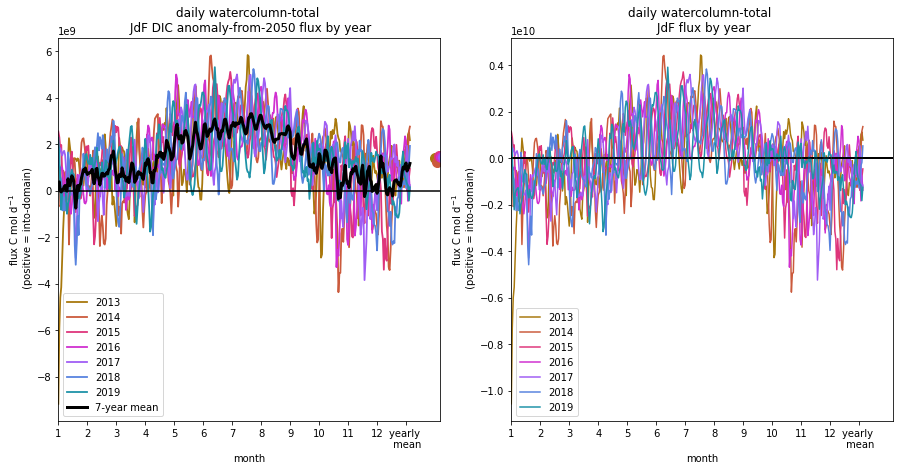

In [29]:
tcmap = cm.cm.phase

fact = 0.7
fig = plt.figure(figsize=( 9*2*fact,9.5*fact)) 

trans = [trans_anomDIC_2050_2013,trans_anomDIC_2050_2014,trans_anomDIC_2050_2015,trans_anomDIC_2050_2016,
        trans_anomDIC_2050_2017,trans_anomDIC_2050_2018,trans_anomDIC_2050_2019]
transtot = np.zeros([7,365])
for i in range(0,len(trans)):
    transtot[i,:] = trans[i][:]

ax1 = plt.subplot2grid((1,2), (0,0), colspan=1,rowspan = 1)

print(np.shape(tdat))
for i in range(0,7):
    ax1.plot(np.arange(0,len(trans[i]),1),trans[i],linewidth = 1.8, \
             color = tcmap(i/9), label = str(i+2013))

    ax1.plot(390+i*2, np.nanmean(trans[i]), color = tcmap(i/9), marker = 'o', markersize = 10)

ax1.plot(np.arange(0,len(trans[i]),1),np.nanmean(transtot, axis = 0),linewidth = 3, \
             color = 'k', label = '7-year mean')
ax1.set_xlim([0,395]); ax1.axhline(y=0,color = 'k'); ax1.legend(); ax1.set_xlabel('month')
ax1.set_title('daily watercolumn-total \n JdF DIC anomaly-from-2050 flux by year')
ax1.set_ylabel('flux C mol d$^{-1}$ \n (positive = into-domain)')
ax1.set_xticks(np.arange(0,390,30))
ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12','yearly \n mean'])
plt.tight_layout()


ax1 = plt.subplot2grid((1,2), (0,1), colspan=1,rowspan = 1)

print(np.shape(tdat))
for i in range(0,7):
    ax1.plot(np.arange(0,len(trans[i]),1),trans[i] - np.nanmean(transtot),linewidth = 1.5, \
             color = tcmap(i/9), label = str(i+2013))
    #ax1.plot(390+i*2, np.nanmean(trans[i]), axis = 0), color = tcmap(i/9), marker = 'o', markersize = 10)
    ax1.set_xlim([0,395]); ax1.axhline(y=0,color = 'k'); ax1.legend(); ax1.set_xlabel('month')
ax1.set_title('daily watercolumn-total \n JdF flux by year')
ax1.set_ylabel('flux C mol d$^{-1}$ \n (positive = into-domain)')
ax1.set_xticks(np.arange(0,390,30))
ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12','yearly \n mean'])
plt.tight_layout()


In [30]:
print(np.shape(trans_anomsal_30pt0_2013_mol_per_gridcell))

(365, 40, 75)


In [31]:
ulength = (grid['e2u'][0,361:(361+75),20])

udep = grid['e3u_0'][0,:,361:(361+75),20]


slice_ar2 = np.zeros([40,75])

for i in range(0,40):
    
    slice_ar2[i,:] = ulength * udep[i,:] 
    
slice_ar2 = slice_ar2*grid['umask'][0,:,361:361+75,20]
slice_ar = slice_ar * grid['umask'][0,:,361:361+75,20]
print(np.sum(slice_ar2))
print(np.sum(slice_ar))

rati = np.sum(slice_ar2)/np.sum(slice_ar)
print(rati)

4553873.834940253
4480154.464802936
1.0164546492127609


(40, 12)


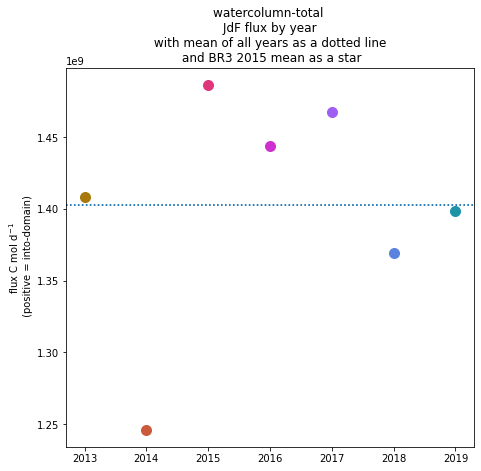

In [32]:
tcmap = cm.cm.phase

fact = 0.7
fig = plt.figure(figsize=( 9*2*fact,9.5*fact)) 

trans = [trans_anomDIC_2050_2013,trans_anomDIC_2050_2014,trans_anomDIC_2050_2015,trans_anomDIC_2050_2016,
        trans_anomDIC_2050_2017,trans_anomDIC_2050_2018,trans_anomDIC_2050_2019]

ax1 = plt.subplot2grid((1,2), (0,0), colspan=1,rowspan = 1)

means = np.arange(0,7,1)
print(np.shape(tdat))
for i in range(0,7):
    
    ax1.plot(i+2013, np.nanmean(trans[i]), color = tcmap(i/9), marker = 'o', markersize = 10)
    means[i] = np.nanmean(trans[i])
ax1.axhline(y = np.nanmean(means), linestyle =':')
ax1.axhline(y = np.nanmean(means), linestyle =':')
#ax1.axhline(y = 0, linestyle ='-')
#ax1.plot(2015,-173.3e9/365/rati,color = tcmap(3/9), marker = '*', markersize = 10)
    #ax1.set_xlim([0,395]); ax1.axhline(y=0,color = 'k'); ax1.legend(); ax1.set_xlabel('month')
ax1.set_title('watercolumn-total \n JdF flux by year \n with mean of all years as a dotted line \n and BR3 2015 mean as a star')
ax1.set_ylabel('flux C mol d$^{-1}$ \n (positive = into-domain)')
plt.tight_layout()


(7, 12)


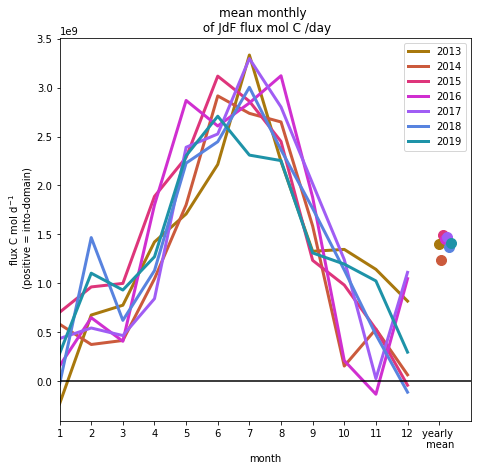

In [33]:
tcmap = cm.cm.phase

fact = 0.7
fig = plt.figure(figsize=( 9*2*fact,9.5*fact)) 

ax1 = plt.subplot2grid((1,2), (0,0), colspan=1,rowspan = 1)
tdat = np.nansum(anomDIC_2050_flux_stor[:,:,:],axis=1)

print(np.shape(tdat))
#colors = ['k','orange','green','fuchsia']; labels = ['JDF','N. Strait','C. Strait','Tidal \n Mixing']
for i in range(0,7):
    ax1.plot(np.arange(1,13,1),tdat[i,:],linewidth = 3, color = tcmap(i/9), label = str(i+2013))
    ax1.plot(13+i*0.06,np.nanmean(tdat[i]),marker = 'o', markersize = 10, color = tcmap(i/9))
ax1.set_xlim([1,14]); ax1.axhline(y=0,color = 'k'); ax1.legend(); ax1.set_xlabel('month')
ax1.set_title('mean monthly \n of JdF flux mol C /day')
ax1.set_ylabel('flux C mol d$^{-1}$ \n (positive = into-domain)')
ax1.set_xticks(np.arange(1,14,1))
ax1.set_xticklabels(['1','2','3','4','5','6','7','8','9','10','11','12','yearly \n mean'])
plt.tight_layout()


# property-property DIC and salinity anomaly - by month and depth

Text(0, 0.5, 'DIC anomaly mol m$^{-2}$ d$^{-1}$')

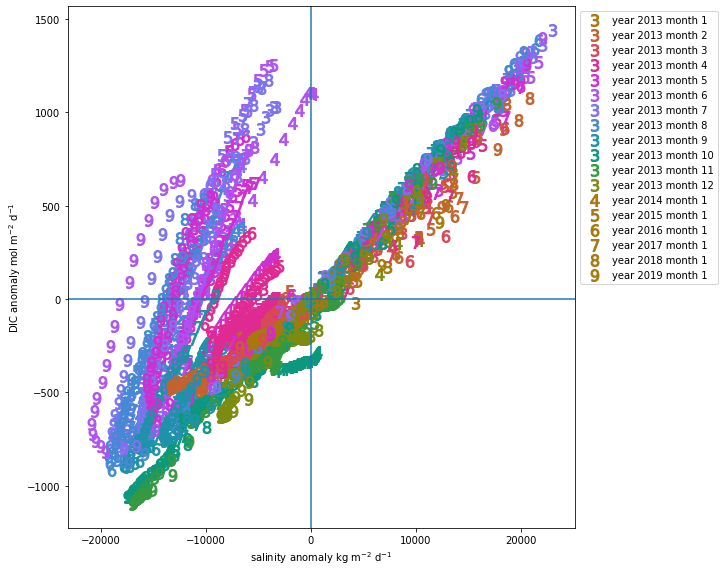

In [34]:
ms = 12; tcmap = cm.cm.phase
fact = 1.01
fig = plt.figure(figsize=( 9*fact,9.5*1*fact)) 
ax1 = plt.subplot2grid((1,1), (0,0), colspan=1,rowspan = 1)

#2013
DICanom_conc = np.divide(anomDIC_2050_flux_stor[0,:,:],size_ar_pr_bc12)
salanom_conc = np.divide(anomsal_flux_stor[0,:,:],size_ar_pr_bc12)
for i in range(0,12):
    ax1.plot(salanom_conc[:,i],DICanom_conc[:,i],\
             marker = '$3$', linestyle = '', markersize = ms, 
             color = tcmap(i/12), label = f'year 2013 month {i+1}')

#2014
DICanom_conc = np.divide(anomDIC_2050_flux_stor[1,:,:],size_ar_pr_bc12)
salanom_conc = np.divide(anomsal_flux_stor[1,:,:],size_ar_pr_bc12)
for i in range(0,12):
    if i ==0:
        ax1.plot(salanom_conc[:,i],DICanom_conc[:,i],\
                 marker = '$4$', linestyle = '', markersize = ms, 
                 color = tcmap(i/12), label = f'year 2014 month {i+1}')
    else:
        ax1.plot(salanom_conc[:,i],DICanom_conc[:,i],\
                 marker = '$4$', linestyle = '', markersize = ms, 
                 color = tcmap(i/12))

#2015
DICanom_conc = np.divide(anomDIC_2050_flux_stor[2,:,:],size_ar_pr_bc12)
salanom_conc = np.divide(anomsal_flux_stor[2,:,:],size_ar_pr_bc12)
for i in range(0,12):
    if i ==0:
        ax1.plot(salanom_conc[:,i],DICanom_conc[:,i],\
                 marker = '$5$', linestyle = '', markersize = ms, 
                 color = tcmap(i/12), label = f'year 2015 month {i+1}')
    else:
        ax1.plot(salanom_conc[:,i],DICanom_conc[:,i],\
                 marker = '$5$', linestyle = '', markersize = ms, 
                 color = tcmap(i/12))
    ax1.legend(bbox_to_anchor = [1.2, 1])

#2016
DICanom_conc = np.divide(anomDIC_2050_flux_stor[3,:,:],size_ar_pr_bc12)
salanom_conc = np.divide(anomsal_flux_stor[3,:,:],size_ar_pr_bc12)
for i in range(0,12):
    if i ==0:
        ax1.plot(salanom_conc[:,i],DICanom_conc[:,i],\
                 marker = '$6$', linestyle = '', markersize = ms, 
                 color = tcmap(i/12), label = f'year 2016 month {i+1}')
    else:
        ax1.plot(salanom_conc[:,i],DICanom_conc[:,i],\
                 marker = '$6$', linestyle = '', markersize = ms, 
                 color = tcmap(i/12))
    ax1.legend(bbox_to_anchor = [1.0, 1])
    
DICanom_conc = np.divide(anomDIC_2050_flux_stor[4,:,:],size_ar_pr_bc12)
salanom_conc = np.divide(anomsal_flux_stor[4,:,:],size_ar_pr_bc12)
for i in range(0,12):
    if i ==0:
        ax1.plot(salanom_conc[:,i],DICanom_conc[:,i],\
                 marker = '$7$', linestyle = '', markersize = ms, 
                 color = tcmap(i/12), label = f'year 2017 month {i+1}')
    else:
        ax1.plot(salanom_conc[:,i],DICanom_conc[:,i],\
                 marker = '$7$', linestyle = '', markersize = ms, 
                 color = tcmap(i/12))
    ax1.legend(bbox_to_anchor = [1.0, 1])
    
DICanom_conc = np.divide(anomDIC_2050_flux_stor[5,:,:],size_ar_pr_bc12)
salanom_conc = np.divide(anomsal_flux_stor[5,:,:],size_ar_pr_bc12)
for i in range(0,12):
    if i ==0:
        ax1.plot(salanom_conc[:,i],DICanom_conc[:,i],\
                 marker = '$8$', linestyle = '', markersize = ms, 
                 color = tcmap(i/12), label = f'year 2018 month {i+1}')
    else:
        ax1.plot(salanom_conc[:,i],DICanom_conc[:,i],\
                 marker = '$8$', linestyle = '', markersize = ms, 
                 color = tcmap(i/12))
    ax1.legend(bbox_to_anchor = [1.0, 1])
    
DICanom_conc = np.divide(anomDIC_2050_flux_stor[6,:,:],size_ar_pr_bc12)
salanom_conc = np.divide(anomsal_flux_stor[6,:,:],size_ar_pr_bc12)
for i in range(0,12):
    if i ==0:
        ax1.plot(salanom_conc[:,i],DICanom_conc[:,i],\
                 marker = '$9$', linestyle = '', markersize = ms, 
                 color = tcmap(i/12), label = f'year 2019 month {i+1}')
    else:
        ax1.plot(salanom_conc[:,i],DICanom_conc[:,i],\
                 marker = '$9$', linestyle = '', markersize = ms, 
                 color = tcmap(i/12))
    ax1.legend(bbox_to_anchor = [1.0, 1])

ax1.axhline(y=0); ax1.axvline(x=0)
ax1.set_xlabel('salinity anomaly kg m$^{-2}$ d$^{-1}$')
ax1.set_ylabel('DIC anomaly mol m$^{-2}$ d$^{-1}$')

In [ ]:
DICanom_conc = np.divide(anomDIC_2050_flux_stor[0,:,:],size_ar_pr_bc12)
salanom_conc = np.divide(anomsal_flux_stor[0,:,:],size_ar_pr_bc12)

DICanom_conc

In [60]:
print(np.shape(anomDIC_2050_flux_stor))

(7, 40, 12)


Text(0, 0.5, 'DIC anomaly mol m$^{-2}$ d$^{-1}$')

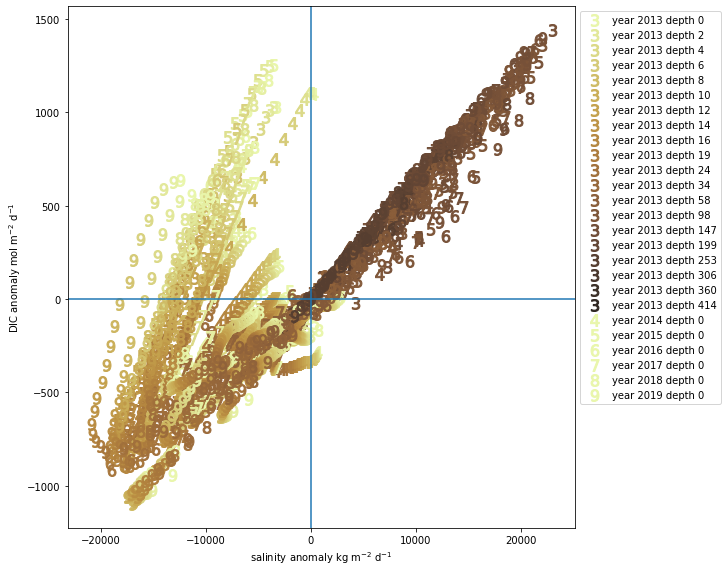

In [35]:
tcmap = cm.cm.turbid
ms = 12
fact = 1.01
fig = plt.figure(figsize=( 9*fact,9.5*1*fact)) 
ax1 = plt.subplot2grid((1,1), (0,0), colspan=1,rowspan = 1)

#2013
DICanom_conc = np.divide(anomDIC_2050_flux_stor[0,:,:],size_ar_pr_bc12)
salanom_conc = np.divide(anomsal_flux_stor[0,:,:],size_ar_pr_bc12)
for i in range(0,40):
    if i%2==0:
        ax1.plot(salanom_conc[i,:],DICanom_conc[i,:],\
                 marker = '$3$', linestyle = '', markersize = ms, 
                 color = tcmap(i/40), label = f'year 2013 depth {int(depths[i])}')
    else:
        ax1.plot(salanom_conc[i,:],DICanom_conc[i,:],\
                 marker = '$3$', linestyle = '', markersize = ms, color = tcmap(i/40))

w = 1; DICanom_conc = np.divide(anomDIC_2050_flux_stor[w,:,:],size_ar_pr_bc12)
salanom_conc = np.divide(anomsal_flux_stor[w,:,:],size_ar_pr_bc12)
for i in range(0,40):
    if i==0:
        ax1.plot(salanom_conc[i,:],DICanom_conc[i,:],\
                 marker = '$4$', linestyle = '', markersize = ms, 
                 color = tcmap(i/40), label = f'year 2014 depth {int(depths[i])}')
    else:
        ax1.plot(salanom_conc[i,:],DICanom_conc[i,:],\
                 marker = '$4$', linestyle = '', markersize = ms, color = tcmap(i/40))

w = 2; DICanom_conc = np.divide(anomDIC_2050_flux_stor[w,:,:],size_ar_pr_bc12)
salanom_conc = np.divide(anomsal_flux_stor[w,:,:],size_ar_pr_bc12)
for i in range(0,40):
    if i==0:
        ax1.plot(salanom_conc[i,:],DICanom_conc[i,:],\
                 marker = '$5$', linestyle = '', markersize = ms, 
                 color = tcmap(i/40), label = f'year 2015 depth {int(depths[i])}')
    else:
        ax1.plot(salanom_conc[i,:],DICanom_conc[i,:],\
                 marker = '$5$', linestyle = '', markersize = ms, color = tcmap(i/40))

w = 3; DICanom_conc = np.divide(anomDIC_2050_flux_stor[w,:,:],size_ar_pr_bc12)
salanom_conc = np.divide(anomsal_flux_stor[w,:,:],size_ar_pr_bc12)
for i in range(0,40):
    if i==0:
        ax1.plot(salanom_conc[i,:],DICanom_conc[i,:],\
                 marker = '$6$', linestyle = '', markersize = ms, 
                 color = tcmap(i/40), label = f'year 2016 depth {int(depths[i])}')
    else:
        ax1.plot(salanom_conc[i,:],DICanom_conc[i,:],\
                 marker = '$6$', linestyle = '', markersize = ms, color = tcmap(i/40))
        
w = 4; DICanom_conc = np.divide(anomDIC_2050_flux_stor[w,:,:],size_ar_pr_bc12)
salanom_conc = np.divide(anomsal_flux_stor[w,:,:],size_ar_pr_bc12)
for i in range(0,40):
    if i==0:
        ax1.plot(salanom_conc[i,:],DICanom_conc[i,:],\
                 marker = '$7$', linestyle = '', markersize = ms, 
                 color = tcmap(i/40), label = f'year 2017 depth {int(depths[i])}')
    else:
        ax1.plot(salanom_conc[i,:],DICanom_conc[i,:],\
                 marker = '$7$', linestyle = '', markersize = ms, color = tcmap(i/40))
        
w = 5; DICanom_conc = np.divide(anomDIC_2050_flux_stor[w,:,:], )
salanom_conc = np.divide(anomsal_flux_stor[w,:,:],size_ar_pr_bc12)
for i in range(0,40):
    if i==0:
        ax1.plot(salanom_conc[i,:],DICanom_conc[i,:],\
                 marker = '$8$', linestyle = '', markersize = ms, 
                 color = tcmap(i/40), label = f'year 2018 depth {int(depths[i])}')
    else:
        ax1.plot(salanom_conc[i,:],DICanom_conc[i,:],\
                 marker = '$8$', linestyle = '', markersize = ms, color = tcmap(i/40))
        
w = 6; DICanom_conc = np.divide(anomDIC_2050_flux_stor[w,:,:],size_ar_pr_bc12)
salanom_conc = np.divide(anomsal_flux_stor[w,:,:],size_ar_pr_bc12)
for i in range(0,40):
    if i==0:
        ax1.plot(salanom_conc[i,:],DICanom_conc[i,:],\
                 marker = '$9$', linestyle = '', markersize = ms, 
                 color = tcmap(i/40), label = f'year 2019 depth {int(depths[i])}')
    else:
        ax1.plot(salanom_conc[i,:],DICanom_conc[i,:],\
                 marker = '$9$', linestyle = '', markersize = ms, color = tcmap(i/40))
        
ax1.legend(bbox_to_anchor = [1.0, 1])
ax1.axhline(y=0); ax1.axvline(x=0)    
ax1.set_xlabel('salinity anomaly kg m$^{-2}$ d$^{-1}$')
ax1.set_ylabel('DIC anomaly mol m$^{-2}$ d$^{-1}$')

In [36]:
%matplotlib ipympl

In [142]:
import mpl_interactions.ipyplot as iplt
import matplotlib.pyplot as plt
import numpy as np

anomsal_flux_stor_conc = np.zeros([7,40,12])
anomDIC_2050_flux_stor_conc = np.zeros([7,40,12])

for i in range(0,7):
    anomsal_flux_stor_conc[i,:,:] = np.divide(anomsal_flux_stor[i,:,:],size_ar_pr_bc12)
    anomDIC_2050_flux_stor_conc[i,:,:] = np.divide(anomDIC_2050_flux_stor[i,:,:],size_ar_pr_bc12)

In [143]:
def sal(year):
    ts = anomsal_flux_stor_conc[year-2013,:,:]
    #print(np.shape(ts))
    ts2 = np.reshape(ts,(40*12))
    #print(np.shape(ts2))
    return ts2

# w = (sal(2013))
def DIC(sal,year):
    tdic = anomDIC_2050_flux_stor_conc[year-2013,:,:]
    tdic2 = np.reshape(tdic,(40*12))
    return tdic2

tcmap = cm.cm.phase
colsamplr = np.zeros([12,4])

for i in range(0,12):
    colsamplr[i,:]  = tcmap(i/12)
# print(color)
# print(np.shape(color))

testcol = np.zeros([480,4])
for i in range(0,480):
    
    testcol[i,:] = colsamplr[i%12,:]

![legend](legend.png)

In [145]:

fig, ax = plt.subplots(figsize=(6, 4.8))
controls = iplt.scatter(
    sal,
    DIC,
    
    s=10,
    year=np.arange(2013, 2020),
    c=testcol,
    #edgecolors="k",
    slider_formats="{:d}",
    play_buttons=True,
    play_button_pos="left",
)
fs = 15
plt.grid()
#ax.set_xscale("log")
ax.set_xlim([-20000, 20000])
ax.set_ylim([-1500,1500])
ax.set_xlabel("Salinity anomaly (kg m$^{-2}$ d$^{-1}$)", fontsize=12)
_ = ax.set_ylabel("DIC anomaly (mol m$^{-2}$ d$^{-1}$)", fontsize=12)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [49]:
import pandas as pd
from matplotlib.colors import to_rgba_array, TABLEAU_COLORS, XKCD_COLORS

data = pd.read_json('nations.json')
def clean_data(data):
    for column in ['income', 'lifeExpectancy', 'population']:
        data = data.drop(data[data[column].apply(len) <= 4].index)
    return data

def extrap_interp(data):
    data = np.array(data)
    x_range = np.arange(1800, 2009, 1.)
    y_range = np.interp(x_range, data[:, 0], data[:, 1])
    return y_range

def extrap_data(data):
    for column in ['income', 'lifeExpectancy', 'population']:
        data[column] = data[column].apply(extrap_interp)
    return data
data = clean_data(data)
data = extrap_data(data)
income_min, income_max = np.min(data['income'].apply(np.min)), np.max(data['income'].apply(np.max))
life_exp_min, life_exp_max = np.min(data['lifeExpectancy'].apply(np.min)), np.max(data['lifeExpectancy'].apply(np.max))
pop_min, pop_max = np.min(data['population'].apply(np.min)), np.max(data['population'].apply(np.max))

In [50]:
def x(year):
    return data["income"].apply(lambda x: x[year - 1800])


def y(x, year):
    return data["lifeExpectancy"].apply(lambda x: x[year - 1800])


def s(x, y, year):
    pop = data["population"].apply(lambda x: x[year - 1800])
    return 6000 * pop.values / pop_max


regions = data["region"].unique().tolist()
c = data["region"].apply(lambda x: list(TABLEAU_COLORS)[regions.index(x)]).values

In [56]:
print(y(x,1850))

0      26.98
1      31.00
2      33.60
3      29.20
4      31.50
       ...  
174    30.40
175    28.97
177    57.91
178    32.00
179    40.80
Name: lifeExpectancy, Length: 178, dtype: float64


In [54]:
fig, ax = plt.subplots(figsize=(10, 4.8))
controls = iplt.scatter(
    x,
    y,
    s=s,
    year=np.arange(1800, 2009),
    c=c,
    edgecolors="k",
    slider_formats="{:d}",
    play_buttons=True,
    play_button_pos="left",
)
fs = 15
ax.set_xscale("log")
ax.set_ylim([0, 100])
ax.set_xlim([200, income_max * 1.05])
ax.set_xlabel("Income", fontsize=fs)
_ = ax.set_ylabel("Life Expectancy", fontsize=fs)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [61]:
np.shape(anomDIC_2050_flux_stor)

(7, 40, 12)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [91]:
print(np.max(sal(DIC,2014)))

4971532460.700001


In [87]:
DIC(2014)

array([-2885344.18871155, -9677361.32806524, -5878484.12361247,
       -4089349.80697632,  5589012.54471436, 35519177.33586833,
       23066176.48327433, 12440713.96663056, -7573293.34667867,
       -9167028.35477066, -3784862.87129567, -1026730.79785207])